In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

# 예제 데이터 생성

In [3]:
X = fetch_california_housing().data
y = fetch_california_housing().target

In [4]:
x_train_full, x_test, y_train_full,y_test = train_test_split(X,y, test_size = 0.2)

In [5]:
x_train,x_valid,y_train,y_valid = train_test_split(x_train_full,y_train_full, test_size = 0.2)

# 텐서플로우 신경망 구축

In [6]:
input_ = tf.keras.layers.Input(shape = x_train.shape[1:])

* 이 라인은 입력 데이터의 형태로 입력 레이어를 생성합니다. 'Input' 레이어는 입력 데이터의 모양을 정의하는 데 사용되며 출력으로 텐서를 반환합니다.

In [7]:
hidden_1 = tf.keras.layers.Dense(30, activation = 'relu')(input_)
hidden_2 = tf.keras.layers.Dense(30, activation = 'relu')(hidden_1)

* 이 라인은 30개의 유닛과 ReLU 활성화 기능을 가진 두 번째 은닉층을 생성합니다. 이전 숨겨진 레이어의 출력을 입력으로 사용합니다.

In [8]:
concat = tf.keras.layers.Concatenate()([input_, hidden_2])

이 줄은 입력 레이어의 출력을 두 번째 숨겨진 레이어의 출력과 연결합니다. 'Concatenate' 레이어는 텐서 목록을 입력으로 받아 지정된 축을 따라 연결합니다. 이 경우 기본 축(axis=1)이 사용됩니다.

In [9]:
output = tf.keras.layers.Dense(1)(concat)

* 이 라인은 단일 단위로 출력 레이어를 생성합니다. 이전 레이어의 연결된 출력을 입력으로 사용하고 모델의 최종 출력을 생성합니다.

In [10]:
model = tf.keras.Model(inputs = [input_],
                        outputs = [output])

* 이 줄은 TensorFlow의 Keras API에서 Model 클래스를 사용하여 모델을 정의합니다. 모델의 입력 및 출력은 각각 입력 계층 및 출력 계층으로 지정됩니다.

In [11]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 30)           270         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 30)           930         ['dense[0][0]']                  
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_1[0][0]',                
                                                                  'dense_1[0][0]']            

# 신경망 시각화 

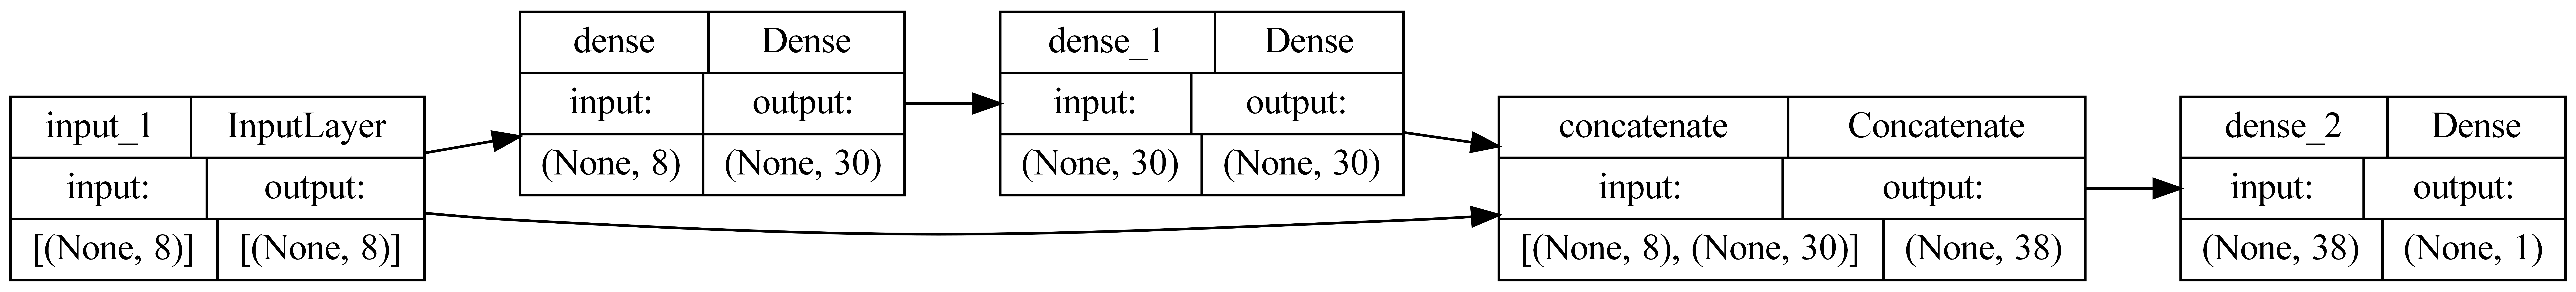

In [12]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True,
            rankdir = 'LR', # 신경망 이미지의 방향 
            dpi = 1000) # 해상도 (default = 96)

# 모델 컴파일 

* 신경망에서 모델 컴파일은 학습 프로세스를 구성하는 프로세스입니다. 여기에는 옵티마이저, 손실 함수 및 평가 지표와 같이 훈련 중에 사용되는 여러 매개변수 설정이 포함됩니다.

In [13]:
eta = tf.keras.optimizers.SGD(learning_rate = 1e-3)

params = {'loss' : 'mean_squared_error',
            'optimizer': eta,
            'metrics':['mse','mae']}

model.compile(**params)

# 데이터 학습 

* 경사하강 중 손실 값이 무한대로 발산하지 않기 위해 학습 세트를 정규화 해주자 

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_valid = scaler.fit_transform(x_valid)
x_test  = scaler.fit_transform(x_test)

* 데이터 로그를 10번에 한 번씩만 남기기 위한 클래스 생성

In [15]:
class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if epoch % 10 == 0:
            print("Epoch {}/{} - loss: {:.4f} - mse: {:.4f} - val_loss: {:.4f} - val_mse: {:.4f} - mae : {:4f} - val_mae : {:4f}".format(
                epoch, 
                self.params['epochs'], 
                logs['loss'], 
                logs['mse'], 
                logs['val_loss'], 
                logs['val_mse'],
                logs['mae'],
                logs['val_mae']
            ))

* 데이터 학습



In [16]:
init_weights = model.get_weights()

model.set_weights([np.zeros_like(w) for w in model.get_weights()]) # 모든 layer 의 가중치를 0 으로 만들어줌

history = model.fit(x_train,y_train,epochs = 50,
                    validation_data = (x_valid,y_valid),
                    verbose = 0,
                    callbacks=[CustomCallback()])

Epoch 0/50 - loss: 3.0836 - mse: 3.0836 - val_loss: 1.6046 - val_mse: 1.6046 - mae : 1.416838 - val_mae : 0.941298
Epoch 10/50 - loss: 0.5579 - mse: 0.5579 - val_loss: 0.5681 - val_mse: 0.5681 - mae : 0.547576 - val_mae : 0.550906
Epoch 20/50 - loss: 0.5326 - mse: 0.5326 - val_loss: 0.5491 - val_mse: 0.5491 - mae : 0.533483 - val_mae : 0.537914
Epoch 30/50 - loss: 0.5258 - mse: 0.5258 - val_loss: 0.5438 - val_mse: 0.5438 - mae : 0.529814 - val_mae : 0.534795
Epoch 40/50 - loss: 0.5241 - mse: 0.5241 - val_loss: 0.5426 - val_mse: 0.5426 - mae : 0.529838 - val_mae : 0.533725


Text(0.5, 0, 'epochs')

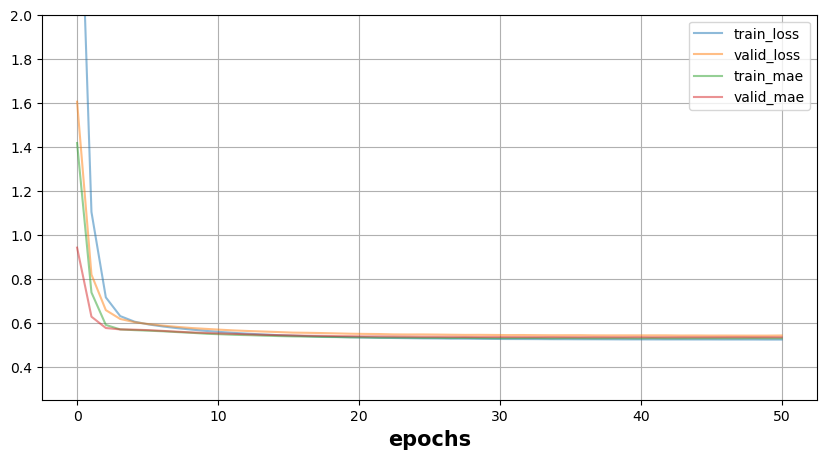

In [19]:
training = pd.DataFrame(history.history)

x = np.linspace(0,50,50)

fig,ax = plt.subplots(figsize = (10,5))

ax.grid()
ax.plot(x, training['loss'], alpha = 0.5, label = 'train_loss')
ax.plot(x, training['val_loss'], alpha = 0.5, label = 'valid_loss')

ax.plot(x,training['mae'], alpha = 0.5, label = 'train_mae')
ax.plot(x,training['val_mae'], alpha = 0.5, label = 'valid_mae')

ax.set_ylim([0.25,2.])
ax.legend()
ax.set_xlabel('epochs', fontdict = {'size': 15,
                                    'weight':'bold'})

In [18]:
from sklearn.metrics import r2_score

predicted = model.predict(x_test)

r2 = r2_score(y_test,predicted)
score = model.evaluate(x_test,y_test)

print('MSE : ',score[1])
print('MAE : ',score[1])
print('R2 : ', r2)

129/129 [==============================] - 0s 670us/step - loss: 0.5147 - mse: 0.5147 - mae: 0.5288
MSE :  0.5146940350532532
MAE :  0.5146940350532532
R2 :  0.5951447764537396
